In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\\machinelearning_projects\\Data Sets\\weather_classification_data.csv")

In [3]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13195    False
13196    False
13197    False
13198    False
13199    False
Length: 13200, dtype: bool

In [5]:
df.drop_duplicates()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


<AxesSubplot:>

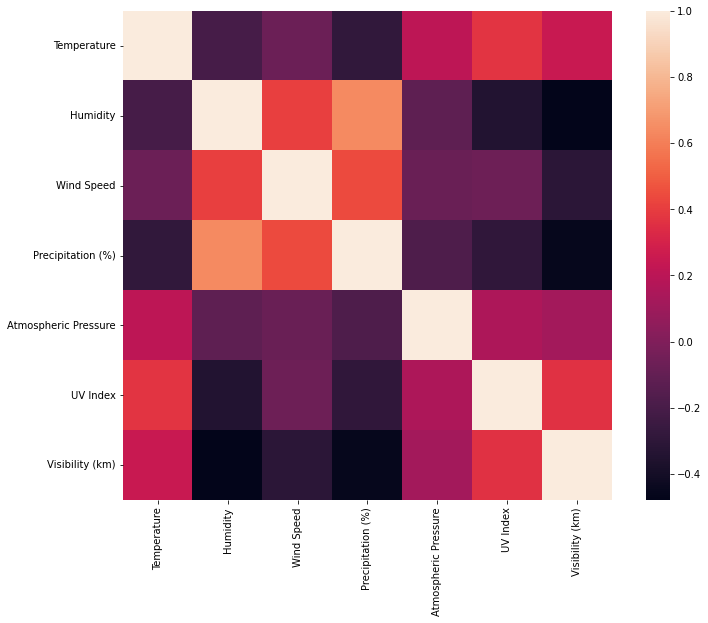

In [8]:
corrl=df.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrl,vmax=1,square=True)

In [9]:
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [16]:
df['Cloud Cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [11]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [17]:
df['Location'].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [18]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
lb=LabelEncoder()

In [25]:
df['Weather Type']=lb.fit_transform(df['Weather Type'])
df['Location']=lb.fit_transform(df['Location'])

In [26]:
df['Weather Type'].unique()

array([1, 0, 3, 2], dtype=int64)

In [27]:
df['Location'].unique()

array([1, 2, 0])

In [30]:
df['Cloud Cover']=lb.fit_transform(df['Cloud Cover'])
df['Cloud Cover'].unique()

array([3, 0, 2, 1])

In [31]:
df['Season']=lb.fit_transform(df['Season'])
df['Season'].unique()

array([3, 1, 2, 0])

In [32]:
df.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


In [35]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [36]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc_X = MinMaxScaler()
x =  sc_X.fit_transform(x)

In [40]:
x

array([[0.29104478, 0.59550562, 0.19587629, ..., 1.        , 0.175     ,
        0.5       ],
       [0.47761194, 0.85393258, 0.17525773, ..., 0.33333333, 0.5       ,
        0.5       ],
       [0.41044776, 0.49438202, 0.1443299 , ..., 0.33333333, 0.275     ,
        1.        ],
       ...,
       [0.41044776, 0.64044944, 0.11340206, ..., 0.        , 0.45      ,
        0.        ],
       [0.20895522, 0.62921348, 0.20618557, ..., 1.        , 0.1       ,
        0.5       ],
       [0.14925373, 0.20224719, 0.        , ..., 0.        , 0.5       ,
        1.        ]])

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8844, 10)
(8844,)
(4356, 10)
(4356,)


In [43]:
from sklearn.linear_model import LogisticRegression

In [94]:
LR=LogisticRegression(penalty='l2',solver='sag',C=3,random_state=44)

In [95]:
LR.fit(x_train,y_train)

LogisticRegression(C=3, random_state=44, solver='sag')

In [96]:
#score
print(LR.score(x_train,y_train))
print(LR.score(x_test,y_test))
print(LR.n_iter_)
print(LR.classes_)

0.860018091361375
0.851010101010101
[28]
[0 1 2 3]


In [97]:
y_pred=LR.predict(x_test)
y_pred_prob=LR.predict_proba(x_test)

In [98]:
y_pred[:5]

array([0, 2, 0, 1, 3], dtype=int64)

In [99]:
y_test[:5]

6373    3
371     2
3530    1
4732    0
8869    3
Name: Weather Type, dtype: int64

In [101]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 914  108   25   64]
 [  54  914   60   40]
 [  32   15 1016   39]
 [ 110   72   30  863]]


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1111
           1       0.82      0.86      0.84      1068
           2       0.90      0.92      0.91      1102
           3       0.86      0.80      0.83      1075

    accuracy                           0.85      4356
   macro avg       0.85      0.85      0.85      4356
weighted avg       0.85      0.85      0.85      4356



In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
Zero = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', Zero)

Zero One Loss Value:  649
